# Airline Dataset

# Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
* Draw the inferences from the clusters obtained.

* Data Description:
 
* The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

* ID --Unique ID

* Balance--Number of miles eligible for award travel

* Qual_mile--Number of miles counted as qualifying for Topflight status

* cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
* cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
* cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

* 1 = under 5,000
* 2 = 5,000 - 10,000
* 3 = 10,001 - 25,000
* 4 = 25,001 - 50,000
* 5 = over 50,000

* Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

* Bonus_trans--Number of non-flight bonus transactions in the past 12 months

* Flight_miles_12mo--Number of flight miles in the past 12 months

* Flight_trans_12--Number of flight transactions in the past 12 months

* Days_since_enrolled--Number of days since enrolled in flier program

* Award--whether that person had award flight (free flight) or not


 
 

# Heirarchical Clustering

In [33]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
airline = pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')

In [35]:
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# EDA

In [36]:
data= airline.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [37]:
data= airline.info
data

<bound method DataFrame.info of        ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0

In [38]:
data = airline[airline.duplicated()].shape
data

(0, 12)

In [39]:
data= airline[airline.duplicated()]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [40]:
data= airline.drop(['ID#','Award?'],axis=1)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [41]:
data.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000


# Visualization

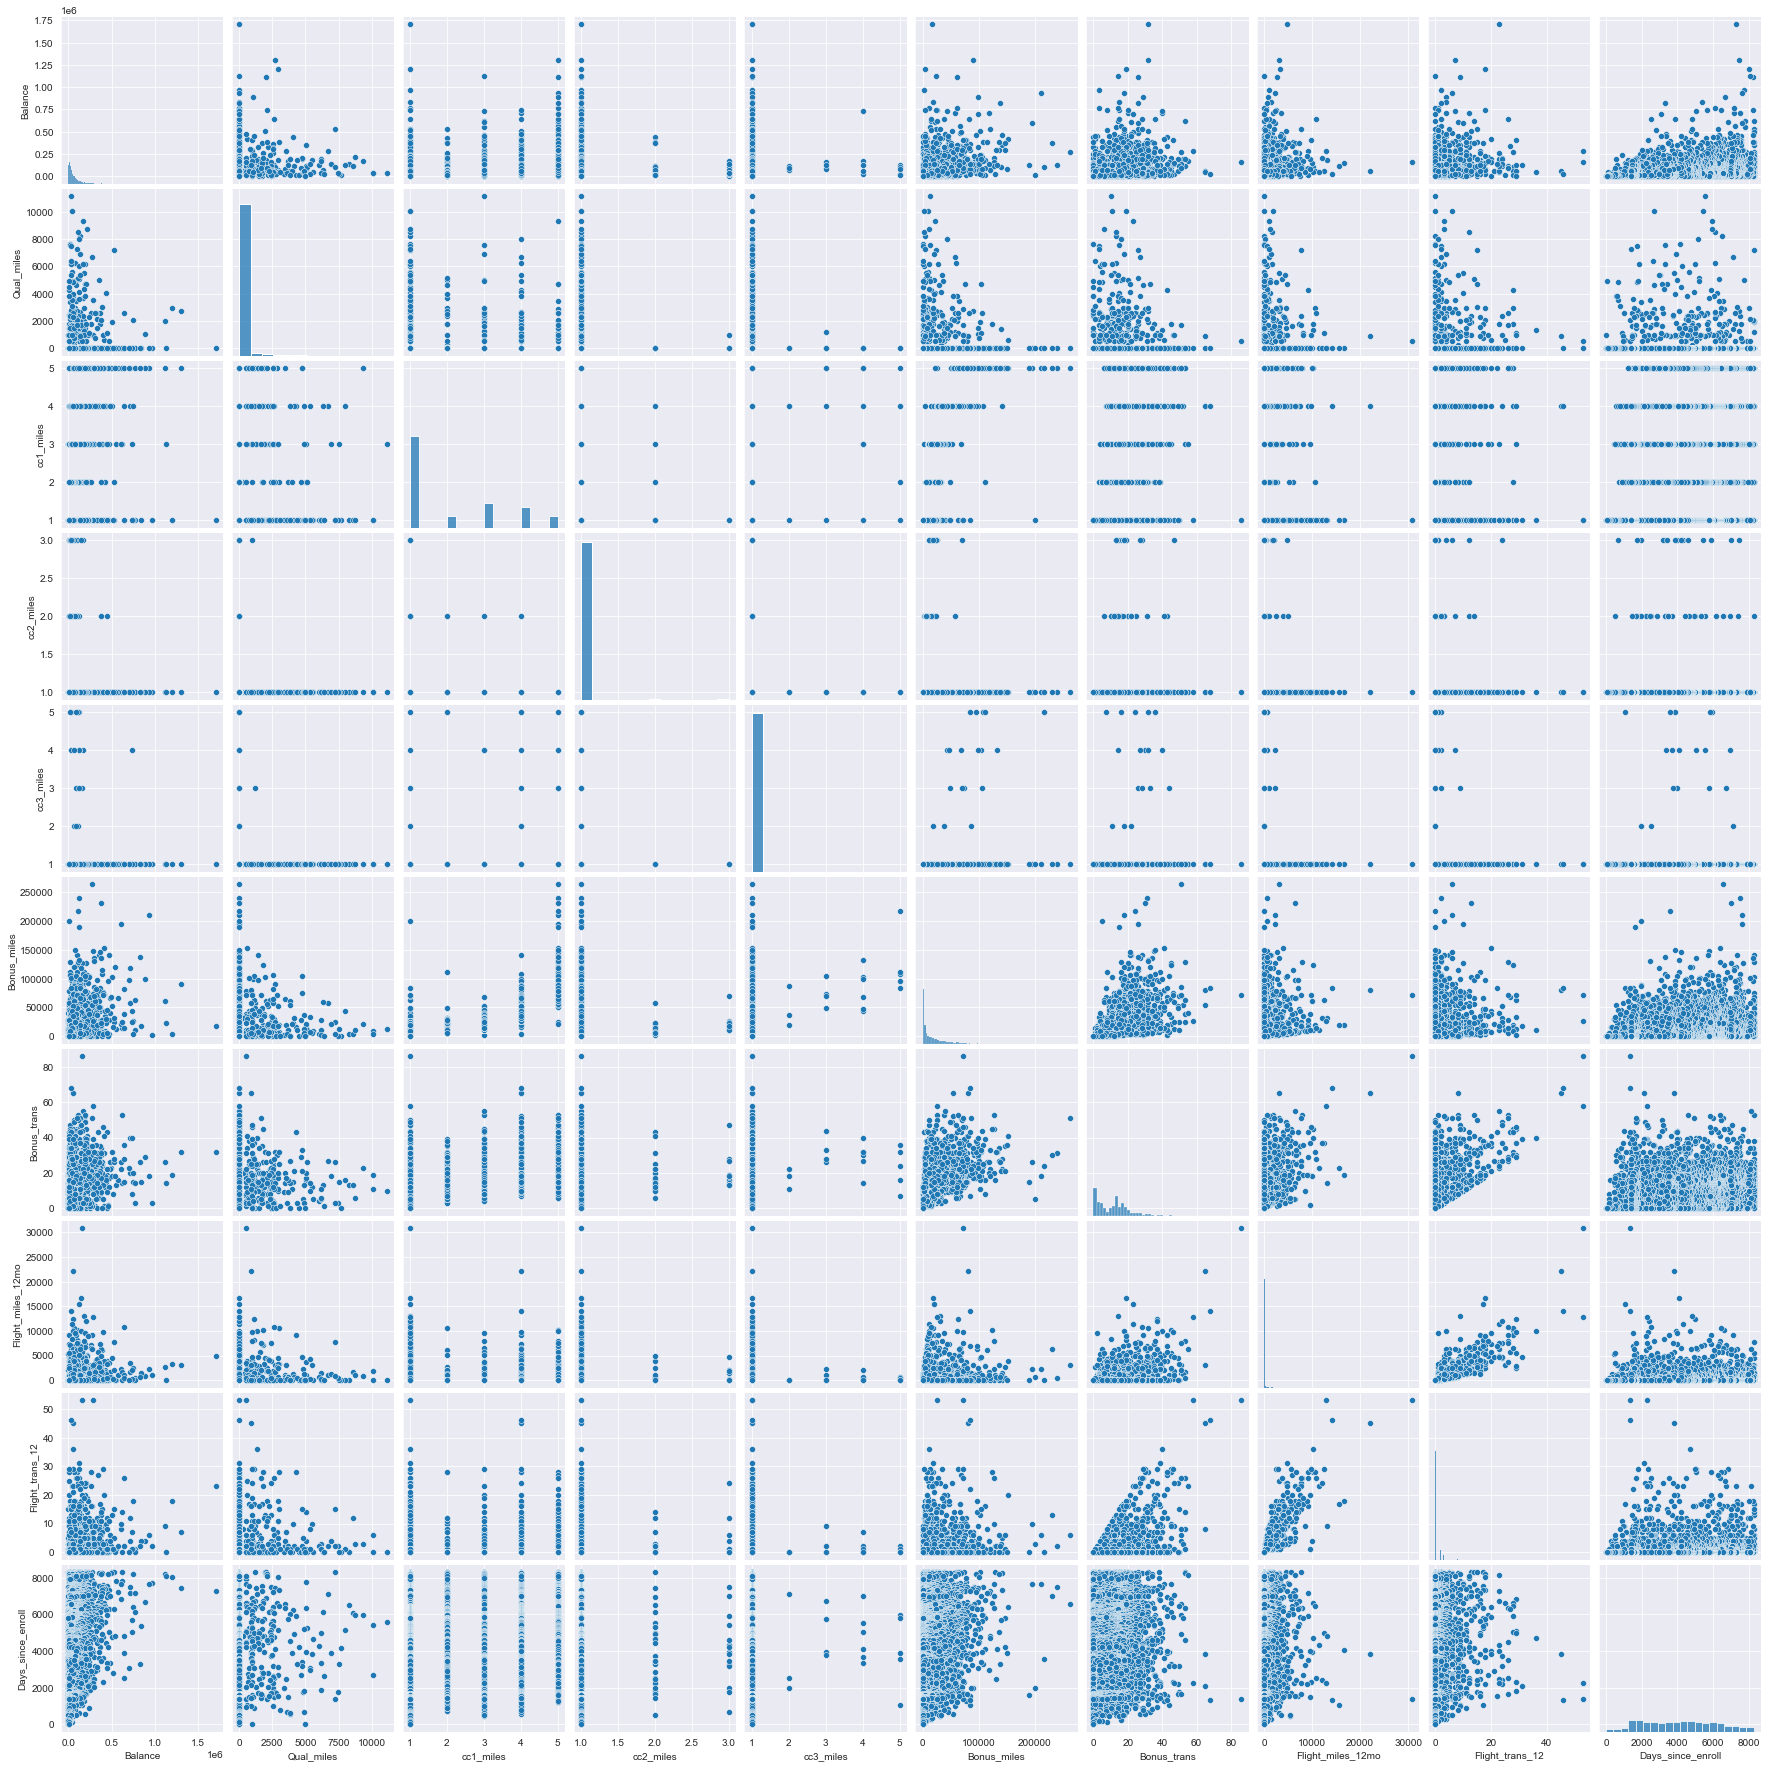

In [42]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [43]:
from sklearn import preprocessing
data_norm = preprocessing.scale(data)

In [44]:
data_norm= pd.DataFrame(data_norm)# standardize the data to normal distrinct

In [45]:
data_norm.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975


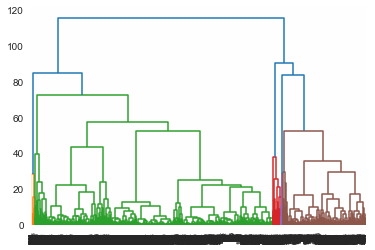

In [46]:
dendrogram= sch.dendrogram(sch.linkage(data_norm,method='ward'))

# K- Means

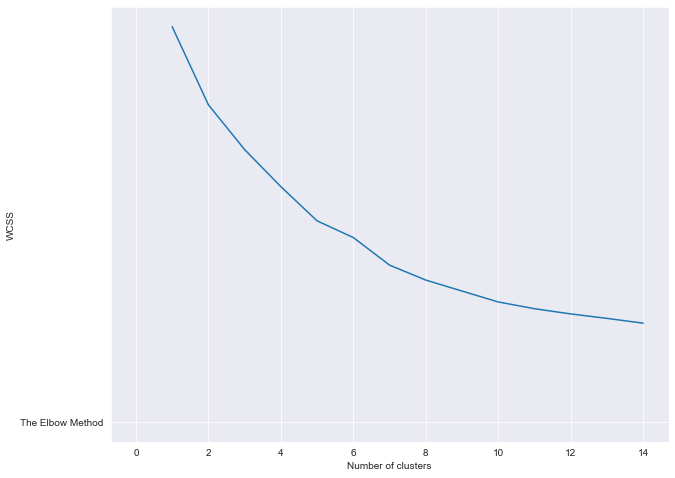

In [56]:
from sklearn.cluster import KMeans
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i,init = 'k-means++', random_state = 42)
    kmeans.fit(data_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.plot('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [57]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
k_means = kmeans.fit_predict(data_norm)

In [58]:
k_means

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
k_means1=k_means+1
k_cluster = list(k_means1)

In [60]:
data['k_cluster'] = k_cluster

In [61]:
kmeans_mean_cluster = pd.DataFrame(round(data.groupby('k_cluster').mean(),1))

In [62]:
kmeans_mean_cluster

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
k_cluster,,,,,,,,,,
1,42723.4,104.5,1.2,1.0,1.0,4341.8,6.7,213.2,0.6,3695.5
2,115547.1,138.7,3.7,1.0,1.0,38945.5,18.8,316.9,0.9,4827.2
3,198856.6,790.4,2.2,1.0,1.0,32951.2,27.4,5383.1,15.9,4737.5


In [63]:
pd.DataFrame(round(data.groupby('k_cluster').count(),1))

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
k_cluster,,,,,,,,,,
1,2491,2491,2491,2491,2491,2491,2491,2491,2491,2491
2,1344,1344,1344,1344,1344,1344,1344,1344,1344,1344
3,164,164,164,164,164,164,164,164,164,164


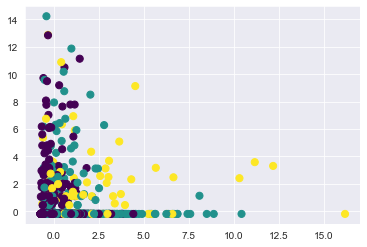

In [64]:
plt.scatter(X[:, 0], X[:, 1], c=k_means, s=50, cmap='viridis')

# DB Scan

In [65]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [66]:
array=data.values
array

array([[28143,     0,     1, ...,     0,  7000,     1],
       [19244,     0,     1, ...,     0,  6968,     1],
       [41354,     0,     1, ...,     0,  7034,     1],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     1],
       [ 3016,     0,     1, ...,     0,  1398,     1]], dtype=int64)

In [68]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [69]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,0
3995,0
3996,0
3997,0


In [71]:
pd.concat([data,cl],axis=1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,k_cluster,cluster
0,28143,0,1,1,1,174,1,0,0,7000,1,0
1,19244,0,1,1,1,215,2,0,0,6968,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,1,0
3,14776,0,1,1,1,500,1,0,0,6952,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,1,0


# Crime Dataset

# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [72]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
%matplotlib inline

In [73]:
crime = pd.read_csv("crime_data.csv")

In [74]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [75]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [76]:
crime.copy()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [77]:
crime.columns = ['City', 'Murder', 'Assault', 'Urbanpop', 'Rape']

In [78]:
crime.head()

,City,Murder,Assault,Urbanpop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [79]:
crime.loc[:,'Total'] = crime.sum(numeric_only=True, axis=1)

In [80]:
crime.head()

,City,Murder,Assault,Urbanpop,Rape,Total
0,Alabama,13.2,236,58,21.2,328.4
1,Alaska,10.0,263,48,44.5,365.5
2,Arizona,8.1,294,80,31.0,413.1
3,Arkansas,8.8,190,50,19.5,268.3
4,California,9.0,276,91,40.6,416.6


In [81]:
crime.describe()

,Murder,Assault,Urbanpop,Rape,Total
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000,265.320000
std,4.35551,83.337661,14.474763,9.366385,98.350844
min,0.80000,45.000000,32.000000,7.300000,93.400000
25%,4.07500,109.000000,54.500000,15.075000,187.950000
50%,7.25000,159.000000,66.000000,20.100000,257.450000
75%,11.25000,249.000000,77.750000,26.175000,348.500000
max,17.40000,337.000000,91.000000,46.000000,462.300000


In [82]:
crime.corr()

,Murder,Assault,Urbanpop,Rape,Total
Murder,1.000000,0.801873,0.069573,0.563579,0.787665
Assault,0.801873,1.000000,0.258872,0.665241,0.984315
Urbanpop,0.069573,0.258872,1.000000,0.411341,0.408785
Rape,0.563579,0.665241,0.411341,1.000000,0.744424
Total,0.787665,0.984315,0.408785,0.744424,1.000000


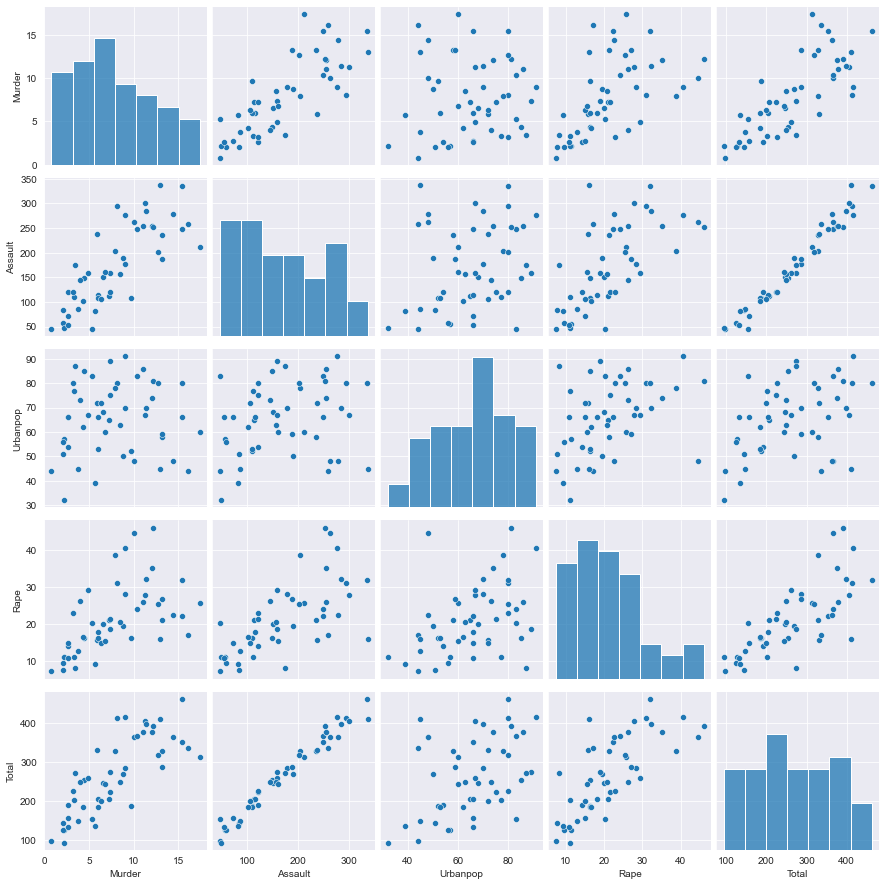

In [83]:
#Visualization
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(crime)

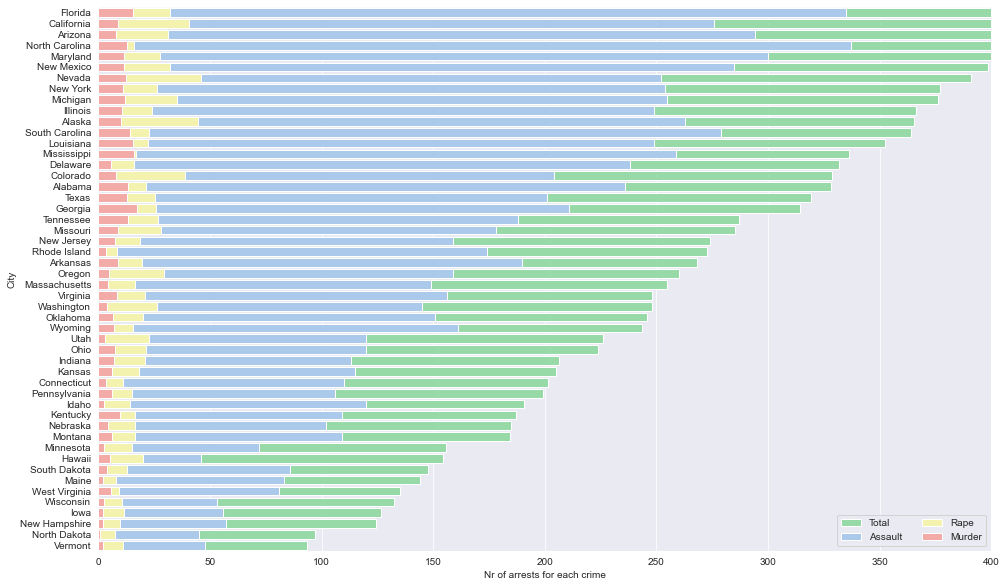

In [84]:
f, ax = plt.subplots(figsize=(16, 10))

stats = crime.sort_values("Total", ascending=False)

sns.set_color_codes("pastel")

sns.barplot(x="Total", y="City", data=stats,
            label="Total", color="g")

sns.barplot(x="Assault", y="City", data=stats,
            label="Assault", color="b")

sns.barplot(x="Rape", y="City", data=stats,
            label="Rape", color="y")

sns.barplot(x="Murder", y="City", data=stats,
            label="Murder", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="City",
       xlabel="Nr of arrests for each crime");

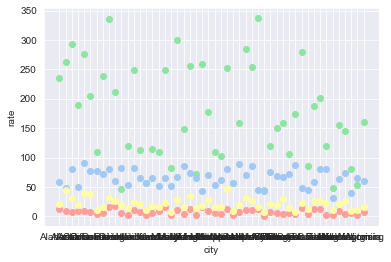

In [85]:
plt.scatter(crime.City, crime.Murder, color='r')
plt.scatter(crime.City, crime.Assault, color='g')
plt.scatter(crime.City, crime.Urbanpop, color='b')
plt.scatter(crime.City, crime.Rape, color='y')
plt.xlabel('city')
plt.ylabel('rate')
plt.show()

In [86]:
# Finding out the optima; number of cluster

In [87]:
X = crime[['Murder','Assault','Rape','Urbanpop']]

In [88]:
crime_norm = preprocessing.scale(X)

In [89]:
crime_norm = pd.DataFrame(crime_norm) # standardize the data to normal dist

In [90]:
crime_norm.head()

,0,1,2,3
0,1.255179,0.790787,-0.003451,-0.526195
1,0.513019,1.118060,2.509424,-1.224067
2,0.072361,1.493817,1.053466,1.009122
3,0.234708,0.233212,-0.186794,-1.084492
4,0.281093,1.275635,2.088814,1.776781


# Hierarchical Clustering

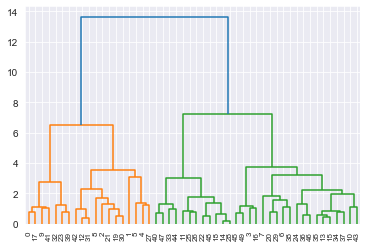

In [91]:
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method='ward'))


In [92]:
X = crime_norm.values

In [93]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean')

In [94]:
h_cluster = model.fit(X)

In [95]:
labels = model.labels_

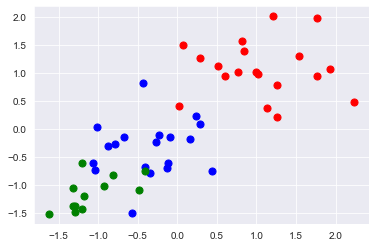

In [96]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')

# K- Means

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


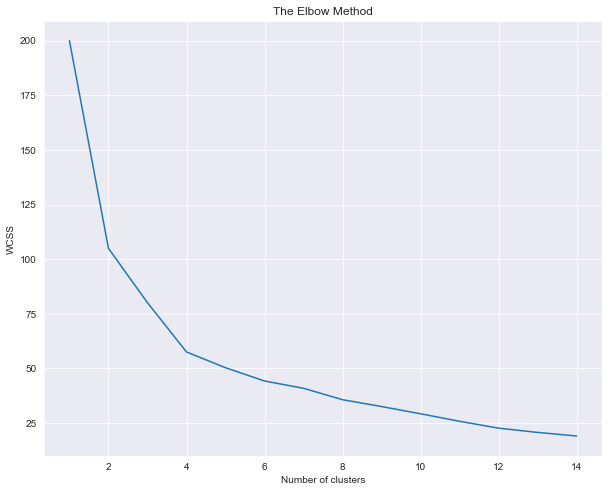

In [97]:
from sklearn.cluster import KMeans
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(crime_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [98]:
# Analysing the data
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(crime_norm)
y_kmeans

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [99]:
y_kmeans1=y_kmeans+1
cluster = list(y_kmeans1)

In [100]:
crime['cluster'] = cluster

In [101]:
kmeans_mean_cluster = pd.DataFrame(round(crime.groupby('cluster').mean(),1))
kmeans_mean_cluster                                

,Murder,Assault,Urbanpop,Rape,Total
cluster,,,,,
1,5.7,138.9,73.9,18.8,237.2
2,13.9,243.6,53.8,21.4,332.7
3,10.8,257.4,76.0,33.2,377.4
4,3.6,78.5,52.1,12.2,146.4


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

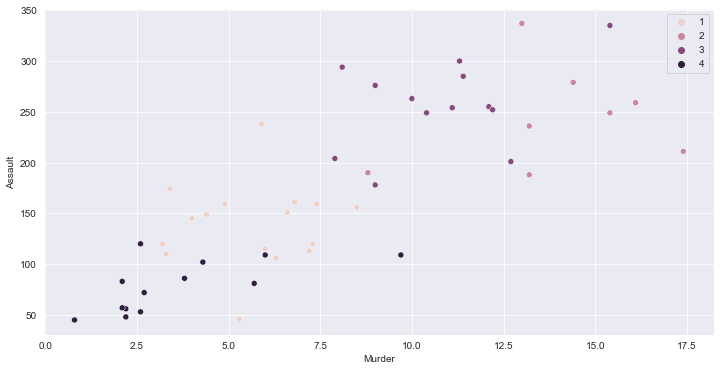

In [102]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=crime['Murder'], y = crime['Assault'],hue=y_kmeans1)

<AxesSubplot:xlabel='Murder', ylabel='Rape'>

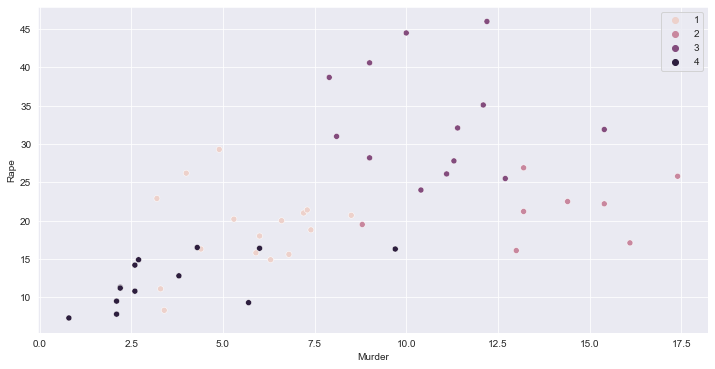

In [103]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=crime['Murder'], y = crime['Rape'],hue=y_kmeans1)

In [104]:
tats = crime.sort_values("Total", ascending=True)
crime_total = pd.DataFrame(stats)

In [105]:
crime_total.head()

,City,Murder,Assault,Urbanpop,Rape,Total
8,Florida,15.4,335,80,31.9,462.3
4,California,9.0,276,91,40.6,416.6
2,Arizona,8.1,294,80,31.0,413.1
32,North Carolina,13.0,337,45,16.1,411.1
19,Maryland,11.3,300,67,27.8,406.1


# DB Scan

In [106]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [107]:
array=crime.values

In [108]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [109]:
#Noisy samples are given the label -1.

dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0],
      dtype=int64)

In [110]:
cr=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cr

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [111]:
pd.concat([crime,cr],axis=1)

,City,Murder,Assault,Urbanpop,Rape,Total,cluster,cluster
0,Alabama,13.2,236,58,21.2,328.4,2,-1
1,Alaska,10.0,263,48,44.5,365.5,3,-1
2,Arizona,8.1,294,80,31.0,413.1,3,-1
3,Arkansas,8.8,190,50,19.5,268.3,2,-1
4,California,9.0,276,91,40.6,416.6,3,-1
5,Colorado,7.9,204,78,38.7,328.6,3,-1
6,Connecticut,3.3,110,77,11.1,201.4,1,-1
7,Delaware,5.9,238,72,15.8,331.7,1,-1
8,Florida,15.4,335,80,31.9,462.3,3,-1
9,Georgia,17.4,211,60,25.8,314.2,2,-1
